# <span style="color:red">  Esercitazione_06</span>


In [22]:
#librerie necessarie

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

In [23]:
#Costati utili

points=100                           #Punti da campionare
kb=8.62e-5                           #Costante di Boltzmann
T = np.linspace(0.5,2,num=points)    #Temperatura
beta = 1/T
J = 1.0                              #Costante di accoppiamento
Ns = 50                              #Numero di spins
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

### Informazioni utili:

- La cartella *<font color="blue">06.1</font>* contiene tutti i codici scritti per la realizzazione dell'esercitazione suddivisi nelle due cartelle *<font color="blue">Gibbs, Metroplis</font>* ognuna corrispondente all'algoritmo di campionamento implementato.
- Nella cartella *<font color="blue">Results</font>* sono già contenuti tutti i risultati di output. Questi ultimi sono quelli analizzati ed esposti in questo notebook e non è quindi necessaria la ricompilazione e la riesecuzione dei codici; nel caso si volessero rieffettuare le simulazioni è sufficiente digitare *"<font color="green">make run</font>"* da terminale. I codici sono strutturati in modo tale che una nuova compilazione vada automaticamente a sostituire i vecchi dati di output con quelli nuovi appena ottenuti.

## Esercizio 06.1

 Con lo scopo di simulare un *modello di Ising 1D* si è scelto campionare il peso di Boltzmann $p(\{ s_i \}) = \frac{\exp(-\beta H)}{Z}$ attraverso due algoritmi diversi: l'algoritmo di Metropolis e l'algoritmo di Gibbs (o heat-bath). 
 
Il sistema preso in considerazione è composto da $N_{spins} = 50$ che possono acquistare valori in $\{-1,1\}$ con un'interazione possibile solo tra primi vicini imponendo condizioni periodiche al contorno (PBC). Di conseguenza l'hamiltoniana del sistema assume la forma:
$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) \, , 
$$
dove $J>0$ è l'intensità dell'interazione tra spins e $h$ è il campo magnetico esterno e considerando ($\mu_B=1$ e $k_B=1$).

Poichè la simulazione necessita di una configurazione di partenza si è scelta quella a temperatura infinita in cui tutti gli spin sono disposti randomicamente. Successivamente il sistema è stato sottoposto ad una fase di equilibrazione consistente in $N_{steps} = 10^3$. In seguito a questa prima fase il sistema viene fatto evolvere attraverso entrambi gli algoritmi designati per una temperaura $T\in\left[0.5;2.0\right]$ con incrementi di $\Delta T =0.05$. Con lo scopo ultimo di applicare il metodo del data blocking sulle grandezze fisiche misurate durante la simulazione quest'ultima è stata ripetuta (per ogni intervello $\Delta T$) un numero pari a $N_{blocks} = 20$, ognuno dei quali possiede un numero di steps dell'algoritmo pari a $M = 10^5$.

Durante lo svolgimento è stato possibile notare che applicando l'algoritmo di Metropolis al diminuire della temperatura la probabilità di accettazione decresce fino a valori $\approx 0.03$. Questo suggerisce una minore efficenza computazionale dell'algoritmo di Metropolis rispetto a quello di Gibbs in cui le "mosse" proposte vengono accettate sempre.

Durante la simulazione sono state calcolate le seguenti grandezze in funzione della temperatura:
1. **Energia interna**: $U(N,T) = \langle H \rangle_{h=0}$
2. **Calore specifico**: $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. **Suscettività**: $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. **Magnetizzazione**: $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

Nei seguenti grafici vengono riportati i risultati ottenuti con l'applicazione di entrambi i metodi di campionamento in confronto alle curve esatte, ricavate dalla soluzione analitica del *modello di Ising 1D*, delle varie grandezze considerate. I valori riportati rappresentano i valori medi delle grandezze con i rispettivi errori (non visibili ad occhio) in funzione della temperatura. 
Come si evince dai grafici i risultati simulati sono compatibili con quelli analitici.

In [24]:
#Soluzioni analitiche

h=0.02 #external field
b = 1/T

#Magnetizzazione
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

#Energia interna
e = -J*( th + ch*thN )/( 1 + thN )
#Calore specifico
heat=(((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2))
#Suscettività
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

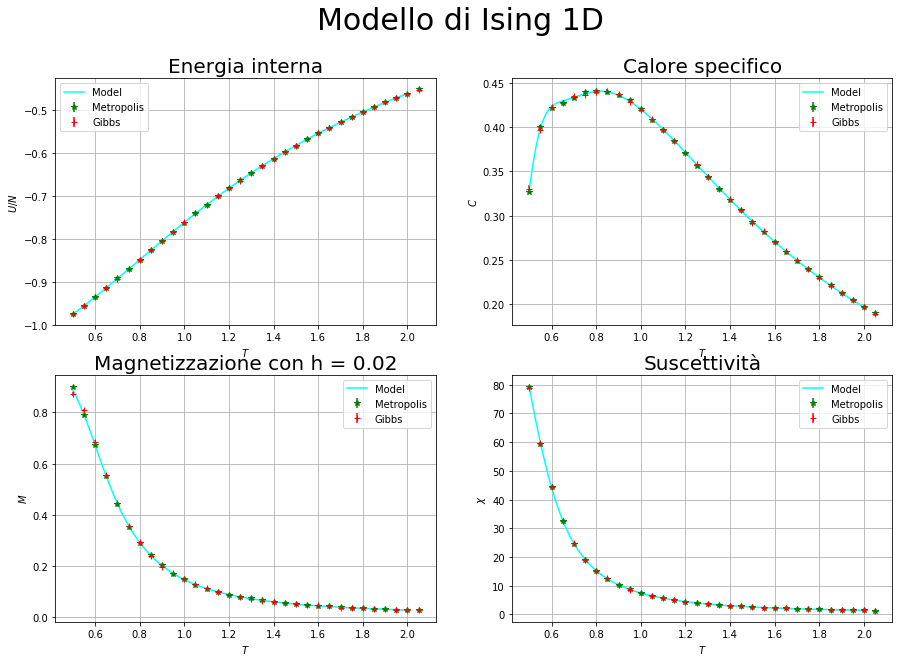

In [30]:
plt.figure(figsize=(15,10))
plt.suptitle('Modello di Ising 1D', fontsize = 30)

#ENERGIA INTERNA
plt.subplot(2,2,1)

N, r, error = np.loadtxt('Results/Metropolis/energy.result.0', usecols=(0,1,2),unpack='true')
plt.errorbar(N,r,yerr=error,color ='green',label = 'Metropolis', fmt='o', marker = '*')
plt.grid(True)

N, r, error = np.loadtxt('Results/Gibbs/energy.result.0', usecols=(0,1,2), unpack='true')
plt.errorbar(N,r,yerr=error,color ='red',label = 'Gibbs',fmt='o',marker = '+')
plt.plot(T, e,label="Model", color = 'cyan')
plt.title('Energia interna', fontsize = 20)
plt.xlabel('$T$')
plt.ylabel('$U/N$')
plt.legend()

#CAPACITA TERMICA
plt.subplot(2,2,2)

N, r, error = np.loadtxt('Results/Metropolis/specific_heat.result.0', usecols=(0,1,2),unpack='true')
plt.errorbar(N,r,yerr=error,color ='green',label = 'Metropolis', fmt='o',marker = '*')
plt.grid(True)

N, r, error = np.loadtxt('Results/Gibbs/specific_heat.result.0', usecols=(0,1,2), unpack='true')
plt.errorbar(N,r,yerr=error,color ='red',label = 'Gibbs',fmt='o',marker = '+')
plt.plot(T, heat,label='Model', color = 'cyan')
plt.title('Calore specifico', fontsize = 20)
plt.xlabel('$T$')
plt.ylabel('$C$')
plt.legend()

#MAGNETIZZAZIONE
plt.subplot(2,2,3)

N, r, error = np.loadtxt('Results/Metropolis/magnetization_h.result.0', usecols=(0,1,2),unpack='true')
plt.errorbar(N,r,yerr=error,color ='green',label = 'Metropolis', fmt='o', marker = '*')
plt.grid(True)

N, r, error = np.loadtxt('Results/Gibbs/magnetization_h.result.0', usecols=(0,1,2), unpack='true')
plt.errorbar(N,r,yerr=error,color ='red',label = 'Gibbs',fmt='o',marker = '+')
plt.plot(T, M,label='Model', color = 'cyan')
plt.title('Magnetizzazione con h = 0.02', fontsize = 20)
plt.xlabel('$T$')
plt.ylabel('$M$')
plt.legend()

#SUSCETTIVITA 
plt.subplot(2,2,4)

N, r, error = np.loadtxt('Results/Metropolis/susceptibility.result.0', usecols=(0,1,2),unpack='true')
plt.errorbar(N,r,yerr=error,color ='green',label = 'Metropolis', fmt='o', marker = '*')
plt.grid(True)

N, r, error = np.loadtxt('Results/Gibbs/susceptibility.result.0', usecols=(0,1,2), unpack='true')
plt.errorbar(N,r,yerr=error,color ='red',label = 'Gibbs',fmt='o', marker = '+')
plt.plot(T, X,label='Model', color = 'cyan')
plt.title('Suscettività', fontsize = 20)
plt.xlabel('$T$')
plt.ylabel('$\chi$')
plt.legend()

plt.show()